<a href="https://colab.research.google.com/github/Sahadat5133/Naibe-Bayes-Classification/blob/main/Fake_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay, classification_report

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [ ]:
data = pd.read_csv('text_dataset.csv')
data.head()

In [ ]:
data['text'][0] # label 1, Real News

'No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:39 minute clip from the radio show can be heard here. It was provided to Breitbart Texas by someone who would like to be referred to

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.shape

(72134, 4)

In [ ]:
data.tail()

,title,text,label
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0
72133,Goldman Sachs Endorses Hillary Clinton For Pre...,Goldman Sachs Endorses Hillary Clinton For Pre...,1


Dataset contains four columns: Serial number (starting from 0); Title (about the text news heading); Text (about the news content); and Class/Label (0 = fake and 1 = real).

In [ ]:
data['text'][72131] # Label 0, Spam News

'Migrants Refuse To Leave Train At Refugee Camp In Hungary\n\nThousands of migrants flooded into a train station in the Hungarian capital Thursday after police lifted a two-day blockade, but some who boarded a train they thought was going to Germany ended up instead at a refugee camp just miles from Budapest.\n\nThe Associated Press reports that "excited migrants piled into a newly arrived train at the Keleti station in Hungary\'s capital despite announcements in Hungarian and English that all services from the station to Western Europe had been canceled. A statement on the main departures board said no more trains to Austria or Germany would depart \'due to safety reasons until further notice!\'\n\n"Many migrants, who couldn\'t understand either language and were receiving no advice from Hungarian officials, scrambled aboard in a standing-room-only crush and hoped for the best," the AP said.\n\nScuffles broke out when police ordered the passengers off the train at Bicske, according to

In [ ]:
data.drop('Unnamed: 0', axis=1, inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   72134 non-null  object
 1   text    72134 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
data.isnull().sum()

,0
title,558
text,39
label,0


# Handle null values and separate features from labels

In [ ]:
data.fillna(' ', inplace=True)
features = data[['title', 'text']]
labels = data['label']

In [ ]:
data.isnull().sum()

,0
title,0
text,0
label,0


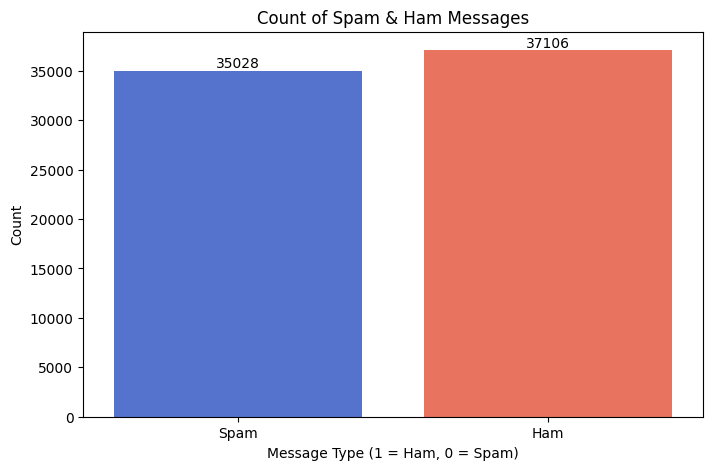

In [ ]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x=data['label'], palette=['royalblue', 'tomato'])
plt.xlabel("Message Type (1 = Ham, 0 = Spam)")
plt.ylabel("Count")
plt.title("Count of Spam & Ham Messages")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=10, color='black')

plt.xticks([1, 0], ["Ham", "Spam"])
plt.show()


In [ ]:
label_Status = data['label'].value_counts()
transactions = label_Status.index
quantity = label_Status.values

figure = px.pie(data,
             values=quantity,
             names=transactions, hole =.60,
             title="Spam & Ham Status")

figure.show()

In [ ]:
data.shape

(72134, 3)

# Create word clouds

In [ ]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)

fake_text = ' '.join(data[data['label'] == 0]['text']) #spam
real_text = ' '.join(data[data['label'] == 1]['text']) #ham

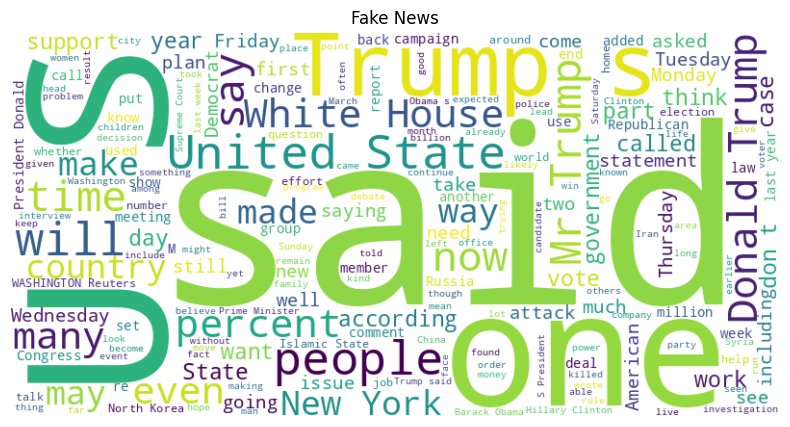

In [ ]:
plot_wordcloud(fake_text, 'Fake News')
plt.show()

In [ ]:
plot_wordcloud(real_text, 'Genuine News')
plt.show()

# Text preprocessing

Stop words are a set of commonly used words in a language. Examples of stop words in English are “a,” “the,” “is,” “are,” etc. Stop words are commonly used in Text Mining and Natural Language Processing (NLP) to eliminate words that are so widely used that they carry very little useful information.

In [ ]:
text_column = 'text'
label_column = 'label'

In [ ]:
english_stopwords = set(stopwords.words('english'))
english_punctuation = string.punctuation

In [ ]:
 string.punctuation

In [ ]:
def preprocess_text(text):
    # Remove punctuation
    remove_punc = [char for char in text if char not in english_punctuation]
    clean_text = ''.join(remove_punc) # char joining

    #Remove stopwords
    words = clean_text.split()
    text = ([word for word in words if word.lower() not in english_stopwords])
    return text

In [ ]:
data[text_column] = data[text_column].apply(preprocess_text)

In [ ]:
data[text_column]

In [ ]:
data[text_column][0]

# Lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in text])
    return lemmatized_text

data[text_column] = data[text_column].apply(lemmatize_text)

In [ ]:
data[text_column]

In [ ]:
data[text_column][0]

# TF-IDF Vectorization

In [ ]:
vectorizer = TfidfVectorizer()

x = vectorizer.fit_transform(data[text_column])
y = data[label_column]


In [ ]:
x

# Split dataset into training and testing sets

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, labels, test_size=0.3, random_state=42)

In [ ]:
xtrain.shape

In [ ]:
xtest.shape

In [ ]:
ytest.shape

# Evaluate Naive Bayes models

In [ ]:
def evaluate_model(model, xtest, ytest):
    y_pred = model.predict(xtest)
    accuracy = accuracy_score(ytest, y_pred)
    cm = confusion_matrix(ytest, y_pred)

    return {
        'Accuracy': accuracy,
        'Confusion Matrix': cm,
    }

# Build Naive Bayes models

# Multinomial Naive Bayes

In [ ]:
mnb_model = MultinomialNB()
mnb_model.fit(xtrain, ytrain)

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

In [ ]:
nb_results = evaluate_model(mnb_model, xtest, ytest)
nb_results

# Evaluate Manually

In [ ]:
cm = confusion_matrix(ytest, mnb_model.predict(xtest))
cm

# Create a heatmap

In [ ]:
plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(ytest, mnb_model.predict(xtest)))

In [ ]:
RocCurveDisplay.from_predictions(ytest, mnb_model.predict(xtest))
plt.plot([0,1],[0,1])
plt.show()

# Bernoulli Naive Bayes

In [ ]:
bnb_model = BernoulliNB()
bnb_model.fit(xtrain, ytrain)

In [ ]:
bnb_results = evaluate_model(bnb_model, xtest, ytest)
bnb_results

In [ ]:
cm_bnb = confusion_matrix(ytest, bnb_model.predict(xtest))
cm_bnb

# Create a heatmap

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bnb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(ytest, bnb_model.predict(xtest)))

In [ ]:
RocCurveDisplay.from_predictions(ytest, bnb_model.predict(xtest))
plt.plot([0,1],[0,1])
plt.show()

#  Apply Logistic Regression

In [ ]:
lr_model = LogisticRegression(max_iter=10000, penalty='l2')
lr_model.fit(xtrain, ytrain)

# Evaluate Logistic Regression

In [ ]:
lr_results = evaluate_model(lr_model, xtest, ytest)

In [ ]:
lr_results

In [ ]:
cm_lr = confusion_matrix(ytest, lr_model.predict(xtest))
cm_lr

# Create a heatmap

In [ ]:
plt.figure(figsize=(8, 6))

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
RocCurveDisplay.from_predictions(ytest, lr_model.predict(xtest))
plt.plot([0,1],[0,1])
plt.show()

# Visualize performance with histogram

In [ ]:
def plot_histogram(metric_values, model_names, metric_name):
    fig, ax = plt.subplots(figsize=(10, 5))
    colors = ['cyan', 'blue', 'black']
    bars = plt.bar(model_names, metric_values, color=colors)
    plt.xlabel('Models')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} for Different Models')

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom', color='black', fontweight='bold')

    plt.show()

accuracy_values = [nb_results['Accuracy'], bnb_results['Accuracy'], lr_results['Accuracy']]
model_names = ['Multinomial Naive Bayes', 'Bernoulli Naive Bayes', 'Logistic Regression']
plot_histogram(accuracy_values, model_names, 'Accuracy')


# Input random text and make a prediction

In [ ]:
models = [mnb_model, bnb_model, lr_model] # objects for ml models

# pipeline

In [ ]:
random_text = input() # enter any text to classify

preprocessed_text = preprocess_text(random_text) # remove punctuation and stopwords

lemmatized_text = lemmatize_text(preprocessed_text) # text scaling

text_vector = vectorizer.transform([lemmatized_text]) # tf-idf vectorizer

In [ ]:
preprocessed_text

In [ ]:
lemmatized_text

In [ ]:
text_vector

In [ ]:
text_vector.shape

In [ ]:
for model in models:
    prediction = model.predict(text_vector)

    print(f"Model Name: {type(model).__name__}")
    print("Prediction:", prediction)
    print('\n')

# Save Good ML Model for Deployment

In [ ]:
import pickle

In [ ]:
model_file_path = 'logistic_regression_model.pkl'




# Load Model

In [ ]:
with open(model_file_path, 'rb') as model_file:
    loaded_LR = pickle.load(model_file)

In [ ]:
loaded_LR.predict(xtest)

In [ ]:
text_vector

In [ ]:
loaded_LR.predict(text_vector)

In [ ]:
loaded_LR.score(xtest, ytest)